# Module 2, Practical 2

In this practical we will learn how to test a Python program and how to measure its runtime and memory usage (i.e., compexity in time and space).

## Testing

Testing a software product allows to check whether the written code actually yields the expected results. In particular, testing the execution of code is called *dynamic* testing.

In Python, we can use `assert` to quickly test that functions we have written behave as they should:  

```
assert(condition)
```

```condition``` must be ```True``` for program execution to continue without errors.  
If it is ```False```, an ```AssertionError``` exception will be raised.

In [1]:
def sumOfTwo(x, y):
    return x + y

# this should return 8
sumOfTwo(3,5)

# check that the function is working properly
assert(sumOfTwo(3,5) == 8)

# what happens here?
assert(sumOfTwo(3,5) == 1)

AssertionError: 

Always remember that these tests are not exhaustive, they check only specific aspects of the function and a subset of possible inputs.  
For example, *what happens if the user provides one integer and one string as parameters?*


In [2]:
sumOfTwo(3, "baduser")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Unit testing

Unit testing refers to tests that verify the functionality of a code unit, typically a function. Asserts are a quick way to test a piece of code but they don't provide us with much detail (e.g. how different is the result we obtained from the expected one?). 
Luckily, Python provides us with a specific module for unit testing: *unittest*.

*unittest* is an OOP-based module - you need to subclass the ```unittest.TestCase``` class:

In [3]:
import unittest

def fibonacci(n):
    lst = []
    for i in range(0, n):
        if(i <= 1):
            lst.append(1)
        else:
            lst.append(lst[i-2] + lst[i-1])
    return(lst)

print("Fibonacci(5):", fibonacci(5))

class FibonacciTest(unittest.TestCase):

    def test_listLength(self):
        self.assertEqual(len(fibonacci(4)), 4)

Fibonacci(5): [1, 1, 2, 3, 5]


The test methods name begins with ```test_```.  

```unittest``` offers many types of assertions: ```assertTrue```, ```assertEqual```, ```assertListEquals``` and more.  

In a command-line environment, the unit test woud be launched by typing:
```python3 -m unittest file_test```  

*Optional, not needed here:* If you are in a notebook, we need to invoke the module explicitly:
```unittest.main(argv=[''], verbosity=2, exit=False)```

**Example**

Try yourself to complete the ```FibonacciTest``` class by adding the following asserts:

1. check that the last (highest) number is correct
2. check that a negative ```n``` provided as input does not break the function
3. check that a floating point ```n``` as input does not break the function  

<details><summary>Show/Hide solution</summary>

In [4]:
import unittest

def fibonacci(n):
    lst = []
    for i in range(0, n):
        if(i <= 1):
            lst.append(1)
        else:
            lst.append(lst[i-2] + lst[i-1])
    return(lst)

print("Fibonacci(5):", fibonacci(5))

class FibonacciTest(unittest.TestCase):

    def test_listLength(self):
        self.assertEqual(len(fibonacci(4)), 4) # fibonacci(4)) returns 4 numbers

    def test_checkLast(self):
        self.assertEqual(max(fibonacci(5)), 5) # last number of fibonacci(5)) is 5

    def test_checkNegative(self):
        self.assertIsNotNone(fibonacci(-10)) # fibonacci(-10) returns something

    def test_checkFloatingPoint(self):
        self.assertIsNotNone(fibonacci(4.5)) # what happens here?

Fibonacci(5): [1, 1, 2, 3, 5]


</details>

The ```checkFloatingPoint``` test fails. Let's fix the ```fibonacci``` function to solve the issue and run the unit tests again!  
  
  

What if we decide to *not* accept a floating point input? We can raise a ```TypeError```  exception and modify the unit test accordingly.

For a preliminary guide to Python exceptions, please refer to the official Python tutorial: [https://docs.python.org/3/tutorial/errors.html](https://docs.python.org/3/tutorial/errors.html)

In [5]:
import unittest

def fibonacci(n):
    if isinstance(n, int):
        lst = []
        for i in range(0, n):
            if(i <= 1):
                lst.append(1)
            else:
                lst.append(lst[i-2] + lst[i-1])
        return(lst)
    else:
        raise(TypeError) # we raise an exception!

print("Fibonacci(5):", fibonacci(5))

class FibonacciTest(unittest.TestCase):

    def test_listLength(self):
        self.assertEqual(len(fibonacci(4)), 4) # fibonacci(4)) returns 4 numbers

    def test_checkLast(self):
        self.assertEqual(max(fibonacci(5)), 5) # last number of fibonacci(5)) is 5

    def test_checkNegative(self):
        self.assertIsNotNone(fibonacci(-10)) # fibonacci(-10) returns something
    
    def test_checkFloatingPoint(self):
        with self.assertRaises(TypeError): # fibonacci(4.5) has to raise an exception
            fibonacci(4.5)


Fibonacci(5): [1, 1, 2, 3, 5]


### Exercise

Modify the ```FibonacciTest``` class to:

1. raise a ```ValueError``` exception if the provided ```n``` is negative
2. check that a big ```n``` (>>100, for example 100,000) does not raise a ```MemoryError``` exception

<details><summary>Show/Hide solution</summary>

In [6]:
import unittest

def fibonacci(n):
    if isinstance(n, int):
        if n > 0:
            lst = []
            for i in range(0, n):
                if(i <= 1):
                    lst.append(1)
                else:
                    lst.append(lst[i-2] + lst[i-1])
            return(lst)
        else:
            raise(ValueError) # we raise an exception!
    else:
        raise(TypeError) # we raise another exception!

print("Fibonacci(5):", fibonacci(5))

class FibonacciTest(unittest.TestCase):

    def test_listLength(self):
        self.assertEqual(len(fibonacci(4)), 4) # fibonacci(4)) returns 4 numbers

    def test_checkLast(self):
        self.assertEqual(max(fibonacci(5)), 5) # last number of fibonacci(5)) is 5

    def test_checkNegative(self):
        with self.assertRaises(ValueError):
            fibonacci(-10) # fibonacci(-10) has to raise an exception this time...
    
    def test_checkFloatingPoint(self):
        with self.assertRaises(TypeError): # fibonacci(4.5) has to raise an exception
            fibonacci(4.5)
    
    def test_checkBig(self):
        self.assertIsNotNone(fibonacci(100000)) # test fibonacci(100000) for memory issues


Fibonacci(5): [1, 1, 2, 3, 5]


</details>
  
## Measuring time

Another aspect of testing is to probe the time and memory required by your algorithms to be executed under different inputs and parameters.  
  
Python provides the ```timeit``` package to measure the execution time of small snippets of code.  
Execution of the snippet is repeated multiple times (```number``` parameter) to allow obtaining an estimate also for the quickest snippets :


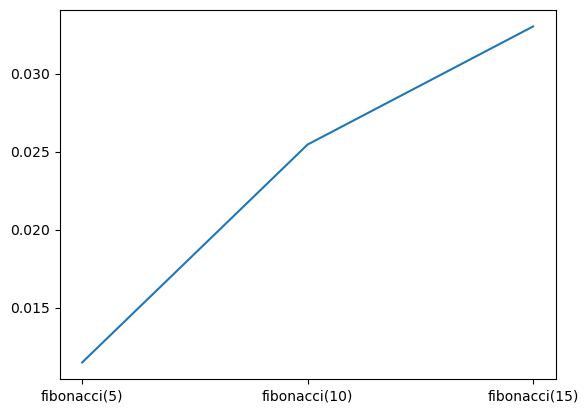

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit

def fibonacci(n):
    if isinstance(n, int):
        if n > 0:
            lst = []
            for i in range(0, n):
                if(i <= 1):
                    lst.append(1)
                else:
                    lst.append(lst[i-2] + lst[i-1])
            return(lst)
        else:
            raise(ValueError)
    else:
        raise(TypeError)

# setup ensures that timeit can access specific functions from your local environment
timeit.timeit('fibonacci(5)', number=10000, setup="from __main__ import fibonacci")

times = []
times.append(timeit.timeit('fibonacci(5)', number=10000, setup="from __main__ import fibonacci"))
times.append(timeit.timeit('fibonacci(10)', number=10000, setup="from __main__ import fibonacci"))
times.append(timeit.timeit('fibonacci(15)', number=10000, setup="from __main__ import fibonacci"))

timeSeries = pd.Series(times)
timeSeries.plot()
# to change x labels...
plt.xticks([0, 1, 2], ['fibonacci(5)', 'fibonacci(10)', 'fibonacci(15)'])
plt.show()
plt.close()

![fibonacciTimes](images/fibonacciTimes.png)

### Exercise

Write the ```recursiveFibonacci``` function that computes the n-th Fibonacci number recursively.  
Test the execution times of the two fibonacci functions with ```n``` ranging from 1 to 20 and plot the two distributions

<details><summary>Show/Hide solution</summary>

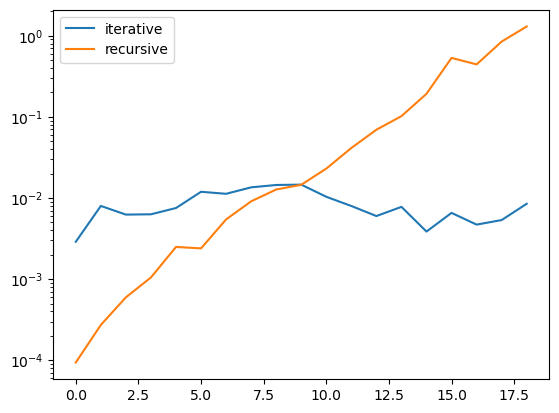

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit

def fibonacci(n):
    if isinstance(n, int):
        if n > 0:
            lst = []
            for i in range(0, n):
                if(i <= 1):
                    lst.append(1)
                else:
                    lst.append(lst[i-2] + lst[i-1])
            return(lst)
        else:
            raise(ValueError)
    else:
        raise(TypeError)

def recursiveFibonacci(n):
    if n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return recursiveFibonacci(n-1) + recursiveFibonacci(n-2)

timesIterative = []
for n in range(1, 20):
    timesIterative.append(timeit.timeit('fibonacci(+' + str(n) + ')', number=1000, setup="from __main__ import fibonacci"))

timesRecursive = []
for n in range(1, 20):
    timesRecursive.append(timeit.timeit('recursiveFibonacci(+' + str(n) + ')', number=1000, setup="from __main__ import recursiveFibonacci"))

timesDict = {'iterative': timesIterative, 'recursive': timesRecursive}
timesDf = pd.DataFrame(timesDict)
timesDf.plot(logy=True) # plot times in logarithmic scale to highlight differences
plt.show()
plt.close()

![fibonacciTimesRec](images/fibonacciTimesRec.png)

</details>

## Measuring memory

Memory used by an object, function or full Python scripts can be measured by different means.  

The ```sys.getsizeof``` method is one of them: 


In [4]:
import sys

l1 = [1]*200
l2 = [2]*400

print(sys.getsizeof(l1))
print(sys.getsizeof(l2))


1656
3256


However, measuring the memory footprint of a whole function (rather than single objects), would be much more useful.  
We can achieve that, for instance, with the ```memory-profiler``` package.

You can install it with pip: ```pip install -U memory_profiler```

In [ ]:
# Save this file as memProfSample.py

from memory_profiler import profile

@profile
def allocatingFunction():
    a = [1] * (10 ** 6)
    b = [2] * (2 * 10 ** 7)
    del b
    return a

if __name__ == '__main__':
    allocatingFunction()

In [ ]:
Filename: memProfSample.py

Line #    Mem usage    Increment  Occurences   Line Contents
============================================================
     5     39.9 MiB     39.9 MiB           1   @profile
     6                                         def allocatingFunction():
     7     47.5 MiB      7.6 MiB           1       a = [1] * (10 ** 6)
     8    200.1 MiB    152.6 MiB           1       b = [2] * (2 * 10 ** 7)
     9     47.5 MiB   -152.6 MiB           1       del b
    10     47.5 MiB      0.0 MiB           1       return a

### Exercise

Test the functionalities introduced in this practical to analyze some of the programs developed during the past lessons.
